In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot

### Import data sets and split into labels and attributes:

In [2]:
#import data
data_diabetes = pd.read_csv('diabetes.csv')
data_glass = pd.read_csv('glass.csv')

Y_diabetes = data_diabetes['class'] 
X_diabetes = data_diabetes.drop(['class'],axis=1) 

Y_glass = data_glass['class'] 
X_glass = data_glass.drop(['class'],axis=1) 

### Create one-level and multi-level trees for both diabetes and glass data sets:

In [3]:
#create trees 
diabetes_1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
diabetes_none = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
glass_1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
glass_none = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)

### Prepare training and test sets for both diabetes and glass data sets:

In [4]:
#split data for applying hold out method
X_train_diabetes, X_test_diabetes, Y_train_diabetes, Y_test_diabetes 
= train_test_split(X_diabetes, Y_diabetes, test_size=0.34, random_state=45353)

X_train_glass, X_test_glass, Y_train_glass, Y_test_glass = 
train_test_split(X_glass, Y_glass, test_size=0.34, random_state=23423423)

## Task C:

In this task we are asked to train one-level decision trees and multi-level 
decision trees on the two data sets. Determine the accuracy rates of the resulting 
classifiers using the training set and hold-out validation. Explain why there is a 
difference inthe accuracy rates. Compare one-level decision trees and multi-level 
decision trees in terms of explainability.  

Create four classifiers, by fitting obtaned data in already created trees. We create 
a classifier for 1-level-tree diabetes train data `ho_clf_diabetes_1`, 1-level-tree 
glass train data `ho_clf_glass_1`,none-level-tree diabetes train data 
`ho_clf_diabetes_none`, none-level-tree glass train data `ho_clf_glass_none`:

In [5]:
#fit the data obtaned in created trees 
ho_clf_diabetes_1 = diabetes_1.fit(X_train_diabetes, Y_train_diabetes)
ho_clf_glass_1 = glass_1.fit(X_train_glass, Y_train_glass)

ho_clf_diabetes_none = diabetes_none.fit(X_train_diabetes, Y_train_diabetes)
ho_clf_glass_none = glass_none.fit(X_train_glass, Y_train_glass)

Create a simple function that would take as input a classifier, label and attribute of a data set
and return the accuracy of the given classifier:

In [6]:
#function to return accuracy of a classifier 
def getAccuracy(clf, X, Y):
    Yp = clf.predict(X)
    return accuracy_score(Y, Yp)

Calculate accuracies of four previously created classifiers:

In [21]:
#accuracy for diabetes clf with max depth = 1  
acc_diabetes_1_train = getAccuracy(ho_clf_diabetes_1, X_train_diabetes, 
                                   Y_train_diabetes)

acc_diabetes_1_test = getAccuracy(ho_clf_diabetes_1, X_test_diabetes, 
                                  Y_test_diabetes)

In [22]:
#accuracy for diabetes clf with max depth = None
acc_diabetes_none_train = getAccuracy(ho_clf_diabetes_none, X_train_diabetes, 
                                      Y_train_diabetes)
acc_diabetes_none_test = getAccuracy(ho_clf_diabetes_none, X_test_diabetes, 
                                     Y_test_diabetes)

In [23]:
#accuracy for glass clf with max depth = 1  
acc_glass_1_train = getAccuracy(ho_clf_glass_1, X_train_glass, Y_train_glass)
acc_glass_1_test = getAccuracy(ho_clf_glass_1, X_test_glass, Y_test_glass)

In [24]:
#accuracy for glass clf with max depth = none 
acc_glass_none_train = getAccuracy(ho_clf_glass_none, X_train_glass, 
                                   Y_train_glass)
acc_glass_none_test = getAccuracy(ho_clf_glass_none, X_test_glass, 
                                  Y_test_glass)

Final results representation using a data frame:

In [25]:
data = {'Name': ['acc diabetes, depth 1:', 'acc diabetes, depth none', 
                 'acc glass, depth 1', 'acc glass, depth none'],
        'Train accuracy': [acc_diabetes_1_train, acc_diabetes_none_train,
                           acc_glass_1_train, acc_glass_none_train],
        'Test accuracy': [acc_diabetes_1_test, acc_diabetes_none_test, 
                          acc_glass_none_test, acc_glass_none_test]}
df = pd.DataFrame(data)
df

,Name,Train accuracy,Test accuracy
0,"acc diabetes, depth 1:",0.749012,0.729008
1,"acc diabetes, depth none",1.000000,0.679389
2,"acc glass, depth 1",0.468085,0.698630
3,"acc glass, depth none",1.000000,0.698630


Results discussion:

From the results we can see that both `depth none` classifiers have `Train accuracy` equal to 1.0 which means that both of them predict correct labels on there data sets with probability of 1.0. Also, both `depth none` classifiers have `Train accuracy` significantly bigger that `Test accuracy` which means that both of them are overfitted. 
For `depth 1` classifiers we can see from results that for both data sets, deviation between the `Test accuracy` and `Train accuracy` is not significantly big because the tree contains just one attribute and the decision is based on this attribute, what makes both `depth 1` classifiers perform overall worse then `depth none` classifiers. 

## Task D:

For this task we are asked to gradually increase the min_samples_leaf value of a tree from 1 to the size of the datasets (with step of 5) and discuss the results of our observations.

In our case, `min_samples_leaf` parameter is used to perform pre-pruning with different values for the minimum amount of instances that need to be in each child of a node to add those children to the decision tree. If there are less instances than the choosen minimum value for a child, the node that has this child will be a leaf node in the decision tree, none if it’s children will be added.

Create a function that takes as input label and attribute of a data set and a real number "min_samples_leaf" and returns a classifier, created ussing a decision tree with `min_samples_leaf` parameter equal to "min_samples_leaf":

In [12]:
#function to return a classifier for trees with min_samples_leaf paremeter
def getClf_minSamplesLeaf(X, Y, min_samples_leaf):
    clf = tree.DecisionTreeClassifier(criterion='entropy',
                                      min_samples_leaf = min_samples_leaf)
    clf.fit(X, Y)
    return clf

Create a function thats stores the accuracies of a classifier using trees with diffrent `min_samples_leaf` value and same data. Inputs are train label and train attribute of a data set, test label and test attribute of a data set and a step size that we want to use to imcrement `min_samples_leaf` parameter. The method ouputs a list of accuraces:

In [13]:
#function to return accuracies of a clf for trees with min_samples_leaf 
#paremeter increasing with a stepsize
def getAcc_minSamplesLeaf(X_train, Y_train, X_test, Y_test, step_size):
    acc = []
    for min_samples_leaf in range(1, len(X_train), step_size):
        clf = getClf_minSamplesLeaf(X_train, Y_train, min_samples_leaf)
        acc.append([min_samples_leaf, getAccuracy(clf, X_train, Y_train), 
                    getAccuracy(clf, X_test, Y_test)])
    return acc

Find the classifiers accuracies for diabetes and glass data sets with step size = 5:

In [14]:
#get accuracies for diabetes and glass for diffrent min_samples_leaf 
#paremeter value
acc_diabetes = getAcc_minSamplesLeaf(X_train_diabetes, Y_train_diabetes, 
                                     X_test_diabetes, Y_test_diabetes, 5)
acc_glass = getAcc_minSamplesLeaf(X_train_glass, Y_train_glass, 
                                  X_test_glass, Y_test_glass, 5)

Plot the results for diabetes data set:

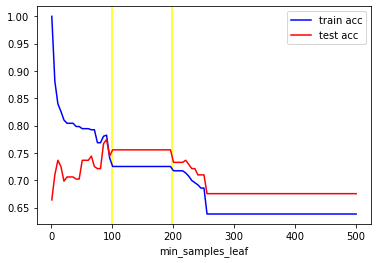

In [15]:
#results for diabetes data set 
acc_diabetes = pd.DataFrame(acc_diabetes,columns=['min_samples_leaf', 
                                                  'train acc', 'test acc'])
%matplotlib inline
pyplot.axvline(x=100, color='yellow')
pyplot.axvline(x=199, color='yellow')
ax = pyplot.gca()
acc_diabetes.plot(kind='line', x='min_samples_leaf', y='train acc',
                  color='blue', ax=ax)
acc_diabetes.plot(kind='line', x='min_samples_leaf', y='test acc',
                  color='red', ax=ax) 
pyplot.show()

Observations:

*Right from yellow lines - models are `underfited`, since they dont give enough complexity, like `depth 1` classifiers.

*Between yellow lines - models are `otimal`, overall accuracy is not too bad and the accuracy on the training set does not differ too much from the accuracy on the test set.

*Left from yellow lines - models `overfit`, both models added too many details of the training data into themself. That is why the accuracy on training set grows up to 1 and the accuracy of testing set is deacreasing.

Plot the results for glass data set:

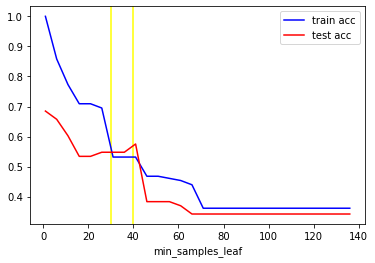

In [16]:
#results for glass data set
acc_glass = pd.DataFrame(acc_glass, columns=['min_samples_leaf', 
                                             'train acc', 'test acc'])
%matplotlib inline
pyplot.axvline(x=30, color='yellow')
pyplot.axvline(x=40, color='yellow')
ax = pyplot.gca()
acc_glass.plot(kind='line', x='min_samples_leaf', y='train acc',
               color='blue', ax=ax)
acc_glass.plot(kind='line', x='min_samples_leaf', y='test acc',
               color='red', ax=ax) 
pyplot.show()

Observations:

In this case the observations are very similar to the previous ones, on diabetes data.

*Right from yellow lines - models are `underfited`, since they dont give enough complexity, like `depth 1` classifiers.

*Between yellow lines - models are `otimal`, overall accuracy is not too bad and the accuracy on the training set does not differ too much from the accuracy on the test set.

*Left from yellow lines - models `overfit`, both models added too many details of the training data into themself. That is why the accuracy on training set grows up to 1 but now the accuracy of testing set also grows but only up to 0.7, which still indicates that the model is overfited.